In [1]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.8
gamma = 0.1
lr = 0.1
distance = np.array([[0, 7, 6, 1, 3], [7, 0, 3, 7, 8], [6, 3, 0, 12, 11], [1, 7, 12, 0, 2], [3, 8, 11, 2, 0]])
R_table = 11 - distance
space = [0, 1, 2, 3, 4]
Q_table = np.zeros((5, 5))

In [2]:
# 进行训练同时测试训练成果
iterate_results = []  # 保存每次测试结果
for i in range(500):
    print(f"开始第{i + 1}回合。。。")
    # 初始位置
    path = [0]
    # 每个回合要获取4个位置
    for j in range(4):
        s = path[j]  # 当前位置
        s_row = Q_table[s]  # 当前位置对应的Q表中的行
        remain = set(space) - set(path)  # 剩余节点
        max_value = -1000
        # 在剩余节点中遍历最大值
        a = 0
        # 利用贪婪策略选择下一行动
        for rm in remain:
            Q = Q_table[s, rm]
            if Q > max_value:
                max_value = Q
                a = rm
        # 随机选择下一行动
        if np.random.uniform() < epsilon:
            a = np.random.choice(np.array(list(set(space) - set(path))))
        # 更新Q表
        if j != 3:
            Q_table[s, a] = (1 - lr) * Q_table[s, a] + lr * (R_table[s, a] + gamma * max_value)
        else:
            Q_table[s, a] = (1 - lr) * Q_table[s, a] + lr * R_table[s, a]
        path.append(a)
        Q_table[a, 0] = (1 - lr) * Q_table[a, 0] + lr * R_table[a, 0]
    # 末尾位置
    path.append(0)

    # 根据当前Q表获取最佳路径距离
    result = [0]
    for k in range(4):
        loc = result[-1]
        remain1 = set(space) - set(result)  # 剩余节点
        max_value1 = -1000
        # 在剩余节点中遍历最大值
        a = 0
        # 利用贪婪策略选择下一行动
        for v in remain1:
            Q_ = Q_table[loc, v]
            if Q_ > max_value1:
                a = v
                max_value1 = Q_
        result.append(a)
    result.append(0)
    length = 0
    for v in range(1, 6):
        length += distance[result[v - 1], result[v]]
    print(f"距离为：{length}")
    iterate_results.append(length)


开始第1回合。。。
距离为：33
开始第2回合。。。
距离为：25
开始第3回合。。。
距离为：25
开始第4回合。。。
距离为：25
开始第5回合。。。
距离为：25
开始第6回合。。。
距离为：25
开始第7回合。。。
距离为：33
开始第8回合。。。
距离为：25
开始第9回合。。。
距离为：25
开始第10回合。。。
距离为：25
开始第11回合。。。
距离为：25
开始第12回合。。。
距离为：25
开始第13回合。。。
距离为：25
开始第14回合。。。
距离为：25
开始第15回合。。。
距离为：25
开始第16回合。。。
距离为：25
开始第17回合。。。
距离为：25
开始第18回合。。。
距离为：25
开始第19回合。。。
距离为：25
开始第20回合。。。
距离为：25
开始第21回合。。。
距离为：25
开始第22回合。。。
距离为：25
开始第23回合。。。
距离为：25
开始第24回合。。。
距离为：24
开始第25回合。。。
距离为：25
开始第26回合。。。
距离为：25
开始第27回合。。。
距离为：24
开始第28回合。。。
距离为：24
开始第29回合。。。
距离为：24
开始第30回合。。。
距离为：20
开始第31回合。。。
距离为：20
开始第32回合。。。
距离为：20
开始第33回合。。。
距离为：20
开始第34回合。。。
距离为：20
开始第35回合。。。
距离为：20
开始第36回合。。。
距离为：20
开始第37回合。。。
距离为：20
开始第38回合。。。
距离为：20
开始第39回合。。。
距离为：20
开始第40回合。。。
距离为：20
开始第41回合。。。
距离为：20
开始第42回合。。。
距离为：20
开始第43回合。。。
距离为：20
开始第44回合。。。
距离为：20
开始第45回合。。。
距离为：20
开始第46回合。。。
距离为：20
开始第47回合。。。
距离为：20
开始第48回合。。。
距离为：20
开始第49回合。。。
距离为：20
开始第50回合。。。
距离为：20
开始第51回合。。。
距离为：20
开始第52回合。。。
距离为：20
开始第53回合。。。
距离为：20
开始第54回合。。。
距离为：20
开始第55回合。。。
距离为：20
开始第56回合。。。
距离为：20
开

In [3]:
# 根据Q表输出最佳路径
result = [0]
for i in range(4):
    loc = result[-1]
    remain1 = set(space) - set(result)  # 剩余节点
    max_value1 = -1000
    # 在剩余节点中遍历最大值
    a = 0
    # 利用贪婪策略选择下一行动
    for v in remain1:
        Q_ = Q_table[loc, v]
        if Q_ > max_value1:
            a = v
            max_value1 = Q_
    result.append(a)
result.append(0)
length = 0
for v in range(1, 6):
    length += distance[result[v - 1], result[v]]
print(f"最终路径安排为：{result}  距离为：{length}")

最终路径安排为：[0, 3, 4, 1, 2, 0]  距离为：20


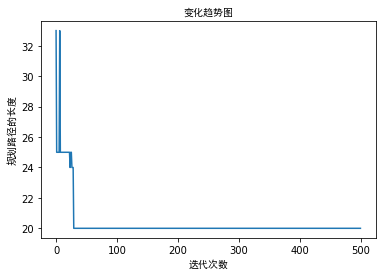

In [4]:
# 绘图
fig, ax = plt.subplots()
ax.plot(iterate_results)
plt.title("变化趋势图", fontproperties='SimHei', fontsize=10)
plt.xlabel("迭代次数", fontproperties='SimHei', fontsize=10)
plt.ylabel("规划路径的长度", fontproperties='SimHei', fontsize=10)
plt.show()